# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/richardmelvin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")



In [4]:
print(f"Key type: {type(api_key)}")             #Verifying that the key and secret code were correctly loaded.

Key type: <class 'str'>


In [7]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [37]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q = "bitcoin AND BTC",           #Getting all English language news articles that mention bitcoin.
                                      language ="en",
                                     page_size = 100,
                                     sort_by = "relevancy"
                                     )       

bitcoin_news["totalResults"]                                             #Curious how many articles are retreived

bitcoin_news["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Arielle Pardes',
 'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
 'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
 'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
 'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
 'publishedAt': '2022-05-10T16:59:46Z',
 'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'}

In [39]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q = "etherium AND ETH",             #Getting all English language news articles that mention etherium.
                                  language = "en",
                                 page_size = 100,
                                 sort_by = "relevancy")             

eth_news["totalResults"]                                                #How many?, I wonder.

eth_news["articles"][0]

{'source': {'id': 'business-insider', 'name': 'Business Insider'},
 'author': 'insider@insider.com (Aprilynne Alter)',
 'title': '50 cryptocurrency and NFT terms you need to know',
 'description': 'Web3 Youtuber Aprilynne Alters shares a list of crypto and NFT words and definitions so that even the most tech-averse folks can understand.',
 'url': 'https://www.businessinsider.com/bitcoin-nft-crypto-web-3-terms-you-should-know-2022-5',
 'urlToImage': 'https://i.insider.com/6287a24e8641770019bd71d6?width=1200&format=jpeg',
 'publishedAt': '2022-05-20T14:20:14Z',
 'content': "If you're inexperienced with NFTS, some terms may be confusing.\r\nI'm a full-time YouTuber focused on demystifying all things Web3, but when I was first learning about the Web3 space, it seemed like p… [+8587 chars]"}

In [42]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_sent_df = pd.DataFrame(eth_sentiments)
    
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_sent_df = bitcoin_sent_df[cols]

display(bitcoin_sent_df.head())
display(bitcoin_sent_df.tail())

,date,text,compound,positive,negative,neutral
0,2022-05-20T14:20:14Z,"If you're inexperienced with NFTS, some terms ...",0.5574,0.135,0.039,0.827
1,2022-05-14T11:13:52Z,"This week, the cryptocurrency market saw a cra...",0.5106,0.168,0.065,0.767
2,2022-05-21T06:48:22Z,People frequently seek for other investing opt...,0.2382,0.061,0.000,0.939
3,2022-05-05T21:20:37Z,"Look what you've done you naughty, reckless ap...",-0.7707,0.000,0.204,0.796
4,2022-05-27T16:00:12Z,Source: https://unsplash.com/s/photos/cryptocu...,0.0000,0.000,0.000,1.000


,date,text,compound,positive,negative,neutral
15,2022-05-29T10:17:51Z,"Metacon powered by GALA, the first ever metave...",0.0000,0.000,0.000,1.000
16,2022-05-24T14:00:00Z,The attack against the Ronin Network in March ...,-0.7430,0.000,0.160,0.840
17,2022-05-11T01:05:27Z,"Coinbase Global, Inc. (NASDAQ:COIN) Q1 2022 Ea...",0.0000,0.000,0.000,1.000
18,2022-05-14T15:21:05Z,"NEW YORK - It’s been a wild week in crypto, ev...",-0.0387,0.078,0.083,0.839
19,2022-05-29T17:19:30Z,"In the modern world, the term "" **blockchain**...",0.0000,0.000,0.000,1.000


In [43]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_sent_df = pd.DataFrame(eth_sentiments)
    
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sent_df = eth_sent_df[cols]

display(eth_sent_df.tail())
display(eth_sent_df.tail())

,date,text,compound,positive,negative,neutral
0,2022-05-20T14:20:14Z,"If you're inexperienced with NFTS, some terms ...",0.5574,0.135,0.039,0.827
1,2022-05-05T17:36:18Z,It was not uncommon to see GPUs sell for hundr...,-0.2500,0.000,0.050,0.950
2,2022-05-02T03:37:19Z,"The web3 company Yuga Lubs, which founded the ...",-0.2732,0.000,0.058,0.942


,date,text,compound,positive,negative,neutral
0,2022-05-20T14:20:14Z,"If you're inexperienced with NFTS, some terms ...",0.5574,0.135,0.039,0.827
1,2022-05-05T17:36:18Z,It was not uncommon to see GPUs sell for hundr...,-0.2500,0.000,0.050,0.950
2,2022-05-02T03:37:19Z,"The web3 company Yuga Lubs, which founded the ...",-0.2732,0.000,0.058,0.942


In [31]:
# Describe the Bitcoin Sentiment
bitcoin_sent_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.119220,0.063350,0.084900,0.851800
std,0.404397,0.060985,0.075734,0.100743
min,-0.859300,0.000000,0.000000,0.557000
25%,-0.386825,0.000000,0.057250,0.827000
50%,-0.284600,0.055000,0.071500,0.878000
75%,0.156025,0.085000,0.103750,0.923000
max,0.750600,0.202000,0.300000,0.964000


In [26]:
# Describe the Ethereum Sentiment
eth_sent_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.091050,0.075300,0.048050,0.876700
std,0.503244,0.082537,0.067005,0.089634
min,-0.770700,0.000000,0.000000,0.752000
25%,-0.091525,0.000000,0.000000,0.819250
50%,0.000000,0.069500,0.000000,0.854000
75%,0.510600,0.135500,0.069500,0.962500
max,0.880700,0.248000,0.204000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etherium had the highest mean positive score.

|Coin| Mean Positive Score|
|:----:|:------------------:|
|Bitcoin|0.063|
|Etherium|0.075|

You need to look at the data closely and realize that this is meaningless. The standard deviation around the mean is equal to or greater than the mean positive score for both coins. So you can only really conclude that the mean positive score is very low. Looking at the data it is clear that the sentiment of the articles is neutral for both coins (0.85 +/- 0.1 and 0.88 +/- 0.09 for bitcoin and etherium, respectively),

Q: Which coin had the highest compound score?

A: Not sure what this question is asking *exactly*. If asking about the mean compound score then etherium has the highest (0.09 vs. -0.12, eth vs. bc, respectively). If highest, means highest observed score then etherium also has that (0.88 vs. 0.75 for eth vs bc, respectively).

Q. Which coin had the highest positive score?

A: Etherium had the highest maximum positive score (0.25). The maximum positive score for Bitcoin was 0.20.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [35]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
#sw_addon = {'wa', 'may', 'one','ha', 'char', 'youre'}
#second_result = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]

In [58]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    sw_addon = {'wa', 'may', 'one','ha', 'char', 'youre'}
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [59]:
# Create a new tokens column for Bitcoin
bitcoin_sent_df['tokens'] = bitcoin_sent_df['text'].apply(tokenizer)
bitcoin_sent_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-20T14:20:14Z,"If you're inexperienced with NFTS, some terms ...",0.5574,0.135,0.039,0.827,"[inexperienced, nfts, term, confusingim, fullt..."
1,2022-05-14T11:13:52Z,"This week, the cryptocurrency market saw a cra...",0.5106,0.168,0.065,0.767,"[week, cryptocurrency, market, saw, crash, unl..."
2,2022-05-21T06:48:22Z,People frequently seek for other investing opt...,0.2382,0.061,0.000,0.939,"[people, frequently, seek, investing, option, ..."
3,2022-05-05T21:20:37Z,"Look what you've done you naughty, reckless ap...",-0.7707,0.000,0.204,0.796,"[look, youve, done, naughty, reckless, ape, yo..."
4,2022-05-27T16:00:12Z,Source: https://unsplash.com/s/photos/cryptocu...,0.0000,0.000,0.000,1.000,"[source, httpsunsplashcomsphotoscryptocurrency..."


In [60]:
# Create a new tokens column for Ethereum
eth_sent_df['tokens'] = eth_sent_df['text'].apply(tokenizer)
eth_sent_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-20T14:20:14Z,"If you're inexperienced with NFTS, some terms ...",0.5574,0.135,0.039,0.827,"[inexperienced, nfts, term, confusingim, fullt..."
1,2022-05-05T17:36:18Z,It was not uncommon to see GPUs sell for hundr...,-0.2500,0.000,0.050,0.950,"[uncommon, see, gpus, sell, hundred, dollar, s..."
2,2022-05-02T03:37:19Z,"The web3 company Yuga Lubs, which founded the ...",-0.2732,0.000,0.058,0.942,"[web, company, yuga, lubs, founded, bored, ape..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [61]:
from collections import Counter
from nltk import ngrams

In [62]:
# Generate the Bitcoin N-grams where N=2
bitcoin_words = tokenizer(''.join(str(bitcoin_sent_df['text'].tolist())))
bitcoin_counts = Counter(ngrams(bitcoin_words, n=2))
print(dict(bitcoin_counts))

{('inexperienced', 'nfts'): 1, ('nfts', 'term'): 1, ('term', 'confusingrnim'): 1, ('confusingrnim', 'fulltime'): 1, ('fulltime', 'youtuber'): 1, ('youtuber', 'focused'): 1, ('focused', 'demystifying'): 1, ('demystifying', 'thing'): 1, ('thing', 'web'): 1, ('web', 'first'): 1, ('first', 'learning'): 1, ('learning', 'web'): 1, ('web', 'space'): 1, ('space', 'seemed'): 1, ('seemed', 'like'): 1, ('like', 'p'): 1, ('p', 'week'): 1, ('week', 'cryptocurrency'): 1, ('cryptocurrency', 'market'): 3, ('market', 'saw'): 1, ('saw', 'crash'): 1, ('crash', 'unlike'): 1, ('unlike', 'many'): 1, ('many', 'ripped'): 1, ('ripped', 'value'): 1, ('value', 'major'): 1, ('major', 'coin'): 1, ('coin', 'like'): 1, ('like', 'bitcoin'): 2, ('bitcoin', 'etherium'): 3, ('etherium', 'well'): 1, ('well', 'alternative'): 1, ('alternative', 'crypto'): 1, ('crypto', 'option'): 1, ('option', 'lau'): 1, ('lau', 'people'): 1, ('people', 'frequently'): 1, ('frequently', 'seek'): 1, ('seek', 'investing'): 1, ('investing', 'o

In [63]:
# Generate the Ethereum N-grams where N=2
eth_words = tokenizer(''.join(str(eth_sent_df['text'].tolist())))
eth_counts = Counter(ngrams(eth_words, n=2))
print(dict(eth_counts))

{('inexperienced', 'nfts'): 1, ('nfts', 'term'): 1, ('term', 'confusingrnim'): 1, ('confusingrnim', 'fulltime'): 1, ('fulltime', 'youtuber'): 1, ('youtuber', 'focused'): 1, ('focused', 'demystifying'): 1, ('demystifying', 'thing'): 1, ('thing', 'web'): 1, ('web', 'first'): 1, ('first', 'learning'): 1, ('learning', 'web'): 1, ('web', 'space'): 1, ('space', 'seemed'): 1, ('seemed', 'like'): 1, ('like', 'p'): 1, ('p', 'uncommon'): 1, ('uncommon', 'see'): 1, ('see', 'gpus'): 1, ('gpus', 'sell'): 1, ('sell', 'hundred'): 1, ('hundred', 'dollar'): 1, ('dollar', 'suggested'): 1, ('suggested', 'retail'): 1, ('retail', 'price'): 1, ('price', 'last'): 1, ('last', 'year'): 1, ('year', 'shortage'): 1, ('shortage', 'unit'): 1, ('unit', 'even'): 1, ('even', 'led'): 1, ('led', 'ethereum'): 1, ('ethereum', 'miner'): 1, ('miner', 'use'): 1, ('use', 'laptop'): 1, ('laptop', 'min'): 1, ('min', 'web'): 1, ('web', 'company'): 1, ('company', 'yuga'): 1, ('yuga', 'lubs'): 1, ('lubs', 'founded'): 1, ('founded'

In [64]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [65]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_words, N=10)

[('cryptocurrency', 9),
 ('market', 6),
 ('crypto', 6),
 ('bitcoin', 5),
 ('etherium', 4),
 ('million', 4),
 ('first', 3),
 ('like', 3),
 ('week', 3),
 ('gold', 3)]

In [66]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_words, N=10)

[('web', 3),
 ('nfts', 2),
 ('ethereum', 2),
 ('inexperienced', 1),
 ('term', 1),
 ('confusingrnim', 1),
 ('fulltime', 1),
 ('youtuber', 1),
 ('focused', 1),
 ('demystifying', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

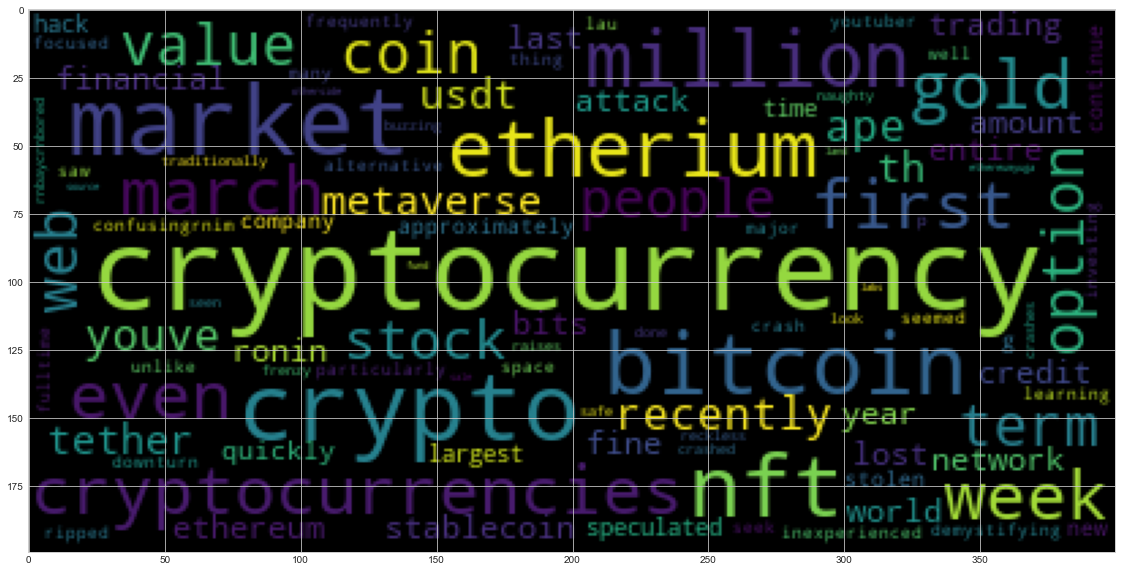

In [74]:
# Generate the Bitcoin word cloud
bitcoin_string = " ".join(bitcoin_words)
wc_bitcoin = WordCloud().generate(bitcoin_string)
plt.imshow(wc_bitcoin)

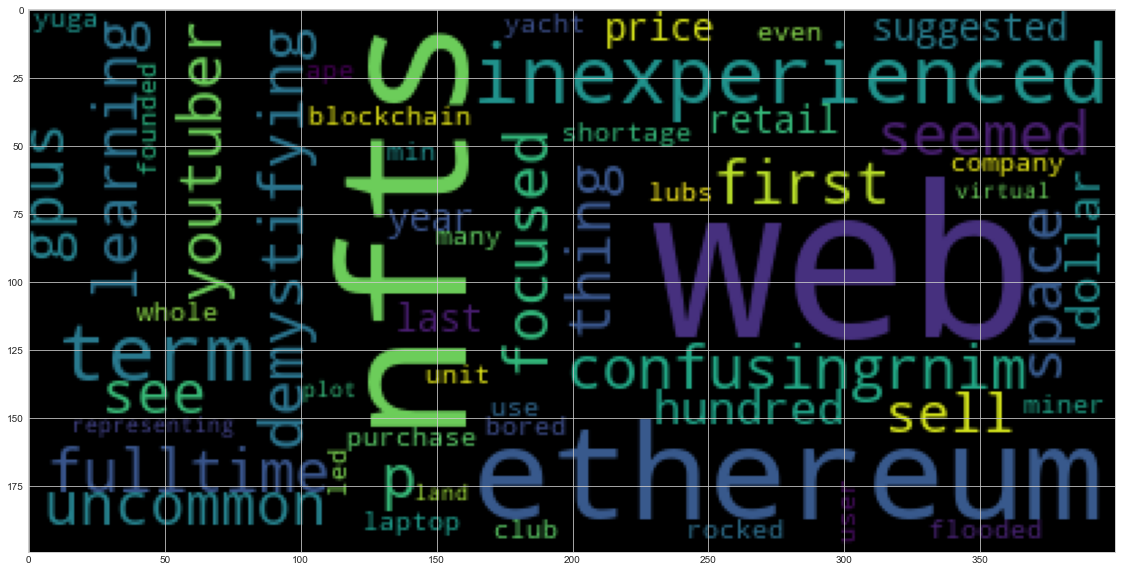

In [75]:
# Generate the Ethereum word cloud
eth_string = " ".join(eth_words)
wc_eth = WordCloud().generate(eth_string)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [76]:
import spacy
from spacy import displacy

In [78]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 2.6 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [79]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [81]:
# Concatenate all of the Bitcoin text together
bitcoin_concat = str(bitcoin_sent_df['text'].tolist())
bitcoin_concat

'["If you\'re inexperienced with NFTS, some terms may be confusing.\\r\\nI\'m a full-time YouTuber focused on demystifying all things Web3, but when I was first learning about the Web3 space, it seemed like p… [+8587 chars]", \'This week, the cryptocurrency market saw a crash unlike many before it one that ripped down the value of major coins like Bitcoin and Etherium, as well as alternative crypto options that had been lau… [+7399 chars]\', \'People frequently seek for other investing options, particularly during stock market downturns. Traditionally, gold was seen to be a safe haven, but recently, the market has been buzzing about crypto… [+4717 chars]\', "Look what you\'ve done you naughty, reckless ape! You\'ve crashed Etherium! \\r\\nBAYC\\r\\nBored Ape Metaverse Frenzy Raises $320 Million, Crashes EthereumYuga Labs sale of #NFT land in Otherside will fund th… [+5555 chars]", \'Source: https://unsplash.com/s/photos/cryptocurrency\\r\\nIntroduction\\r\\nAs of March 2022, the crypto

In [84]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_concat)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin spaCy Entity Visualization"

In [85]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [86]:
# List all Entities
for ent in bitcoin_doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

confusing.\r\nI'm PERSON
YouTuber ORG
first ORDINAL
This week DATE
Bitcoin and Etherium ORG
Etherium ORG
Ape Metaverse Frenzy PERSON
$320 Million MONEY
EthereumYuga Labs PERSON
Otherside ORG
March 2022 DATE
over $2 trillion MONEY
1 CARDINAL
Tether ORG
USDT ORG
Bitcoin and Etherium ORG
Tether PERSON
USDT ORG
Ethereum ORG
HO CHI MINH CITY WORK_OF_ART
VIETNAM GPE
May 15, 2022 DATE
the fictional year 2140 DATE
$5.5 million MONEY
USD ORG
SEC ORG
Tel Aviv GPE
Israel GPE
first ORDINAL
card:\r\nMax ORG
purchases\r\n Max PERSON
Israe LOC
hundreds of dollars MONEY
last year DATE
Ethereum ORG
Thursday DATE
$200 billion MONEY
under $25,000 MONEY
2019 DATE
Argentina GPE
the Ronin Network FAC
March DATE
Approximately $540 million MONEY
NFT ORG
Bitcoin and Etherium ORG
last week DATE
Friday DATE
Nasdaq ORG
one-day DATE
November of 2020 DATE
Frida GPE
GALA ORG
first ORDINAL
today, May 28th DATE
tomorrow, May 29 DATE
the Ronin Network FAC
March DATE
Approximately $540 million MONEY
NFT ORG
Coinbase Glo

---

### Ethereum NER

In [89]:
# Concatenate all of the Ethereum text together
eth_concat = str(eth_sent_df['text'].tolist())
eth_concat

'["If you\'re inexperienced with NFTS, some terms may be confusing.\\r\\nI\'m a full-time YouTuber focused on demystifying all things Web3, but when I was first learning about the Web3 space, it seemed like p… [+8587 chars]", \'It was not uncommon to see GPUs sell for hundreds of dollars above the suggested retail price during most of last year. The shortage of units even led some Ethereum miners to use their laptops to min… [+6896 chars]\', \'The web3 company Yuga Lubs, which founded the Bored Ape Yacht Club, just rocked the whole Ethereum blockchain after many users flooded to purchase the NFTS representing virtual plots of land for its … [+3090 chars]\']'

In [91]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_concat)


# Add a title to the document
bitcoin_doc.user_data["title"] = "Etherium spaCy Entity Visualization"

In [92]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [93]:
# List all Entities
for ent in eth_doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

confusing.\r\nI'm PERSON
YouTuber ORG
first ORDINAL
hundreds of dollars MONEY
last year DATE
Ethereum ORG
Yuga Lubs PERSON
Ethereum ORG


---